<a href="https://colab.research.google.com/github/rjhalliday/python-anomaly-detection/blob/main/isolationforest_anomaly_detection_with_syynthetic_log_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated Log Entries (Before Anomaly Detection):
             Timestamp LogLevel  ResponseTime
0  2024-01-01 00:00:00     INFO    224.835708
1  2024-01-01 01:00:00     INFO    193.086785
2  2024-01-01 02:00:00     INFO    232.384427
3  2024-01-01 03:00:00     INFO    276.151493
4  2024-01-01 04:00:00     INFO    188.292331
5  2024-01-01 05:00:00     INFO    188.293152
6  2024-01-01 06:00:00     INFO    278.960641
7  2024-01-01 07:00:00     INFO    238.371736
8  2024-01-01 08:00:00     INFO    176.526281
9  2024-01-01 09:00:00     INFO    227.128002
10 2024-01-01 10:00:00     INFO    176.829115
11 2024-01-01 11:00:00     INFO    176.713512
12 2024-01-01 12:00:00     INFO    212.098114
13 2024-01-01 13:00:00     INFO    104.335988
14 2024-01-01 14:00:00     INFO    113.754108
15 2024-01-01 15:00:00     INFO    171.885624
16 2024-01-01 16:00:00     INFO    149.358444
17 2024-01-01 17:00:00     INFO    215.712367
18 2024-01-01 18:00:00     INFO    154.598796
19 2024-01-01 19:00:00     INF

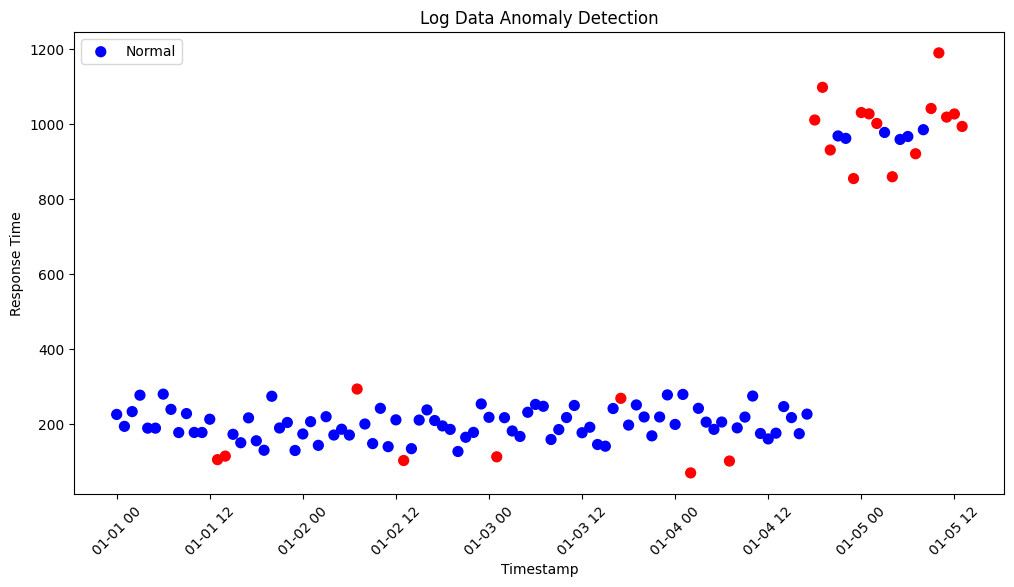

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Description:
# This script generates synthetic log data, applies anomaly detection using the Isolation Forest algorithm,
# and visualizes the results. The synthetic data includes timestamps, log levels, and response times.
# Anomalies are detected based on the response times, and the results are visualized using a scatter plot.

# Seed for reproducibility
np.random.seed(42)

# Generate a sequence of timestamps for log entries
timestamps = pd.date_range(start='2024-01-01', periods=110, freq='H')

# Generate log levels with a mix of 'INFO', 'WARN', and 'ERROR'
log_levels = ['INFO'] * 90 + ['WARN'] * 15 + ['ERROR'] * 5

# Generate numeric response times with normal and anomalous values
# Normal response times
response_times = np.random.normal(loc=200, scale=50, size=90)
# Anomalous response times (higher mean and variance)
response_times = np.concatenate([response_times, np.random.normal(loc=1000, scale=100, size=20)])

# Create a DataFrame with the generated data
df = pd.DataFrame({
    'Timestamp': timestamps,
    'LogLevel': log_levels,
    'ResponseTime': response_times
})

# Display the first few rows of the generated log entries for verification
print("Generated Log Entries (Before Anomaly Detection):")
print(df.head(20)) # print first 20 rows of df

# Convert categorical log levels to numerical values for the anomaly detection algorithm
# INFO -> 0, WARN -> 1, ERROR -> 2
df['LogLevel'] = df['LogLevel'].map({'INFO': 0, 'WARN': 1, 'ERROR': 2})

# Select relevant features for anomaly detection: LogLevel and ResponseTime
features = df[['LogLevel', 'ResponseTime']]

# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the Isolation Forest model
# The 'contamination' parameter specifies the expected proportion of anomalies in the dataset
iso_forest = IsolationForest(contamination=0.2, random_state=42)

# Fit the model to the scaled features
iso_forest.fit(scaled_features)

# Predict anomalies using the Isolation Forest model
# The model labels anomalies as -1 and normal points as 1
df['Anomaly'] = iso_forest.predict(scaled_features)
# Map the prediction labels to 'Normal' and 'Anomaly'
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Display the DataFrame with anomaly detection results for verification
print("\nLog Entries with Anomaly Detection Results:")
print(df.head(20))

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot of response times with different colors for normal and anomalous entries
plt.scatter(df['Timestamp'], df['ResponseTime'], c=df['Anomaly'].map({'Normal': 'blue', 'Anomaly': 'red'}), marker='o', s=50)

# Labeling the plot
plt.xlabel('Timestamp')
plt.ylabel('Response Time')
plt.title('Log Data Anomaly Detection')
plt.legend(['Normal', 'Anomaly'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()
